## Jupyter Placeholder with learn-env

### Problem:

- Microsoft want to create a new movie studio but have no idea about creating movies
- respondible to ecplore what types of films are currently doing the best at the box office
- turn analysis to actionable insights
- the results from that will help Microsoft's new movie studio decide what type of films to create.

### Data:

- main data to use: IMDB (sql data) - movie_basics and movie_ratings table
- bom.movie_gross.csv 

### Analysis:

- Your analysis should yield three concrete business recommendations.
- Communicating about your work well is extremely important.
- highlighting the most important points and skipping over the rest.
- Use plenty of visualizations.
-  three visualizations which correspond to three business recommendations.

### Measurements to consider in measuring a movie's success based on [article](https://www.hollywoodreporter.com/movies/movie-news/what-is-profitable-movie-ever-1269879/)

- production cost
- box office gross
- marketing domestic/international
- rentals (the money the studio makes)
- distribution fee
- theatrical profit 
- international revenue



### Measurements available from data files

- domestic gross
- foreign gross


## Data understanding

### IMDB Database

* `movie_basics` : Table containing movies including original movie title, premiered movie title(primary title?), release year, length of the movie and the genre
* `persons` : Table containing the name of people in the theatre entertainment industry and their primary profession (actor, director etc.)
* `directors`: Table with movie ID and its correspongin director's ID
* `known_for`: Table containing the person's ID and the corresponding movie ID that the person is known for.
* `movie_akas`: Table containing movies and the title they are known as in different countries.
* `movie_ratings`: Table containing movie ID and their average rating and number of ratings they received on IMDB
* `principals`: Table containing movie ID and the corresponding person ID that is involved in the movie in some sort of capacity, specified in the category, jobs and character (if they are actors) columns.
* `writers` : Table containing movie ID and their corresponding writers' person ID

### bom.movie_gross.csv
* **Source** : This dataset comes from [Box office mojo](https://www.boxofficemojo.com/) - a website that tracks film revenue
* **Contents** : Data about movies' domestic and international gross profit along with the name of studio production and release year

### rt.movie_info.tsv
* **Source** : This dataset comes from [Rotten Tomatoes](https://www.rottentomatoes.com/) - an "online aggregator of movie and TV show reviews from critics"
* **Contents** : Data about movies including their synopsis, rating, genre, director, writer, release data in theatre, release data on DVD, Box office rental profit, length of movie and studio of production.

### rt.reviews.tsv
* **Contents** : Data about movies' domestic and international gross profit along with the name of studio production and release year

### tmdb.movies.csv
* **Contents** : Data about movies' domestic and international gross profit along with the name of studio production and release year

### tn.movie_budgets.csv
* **Contents** : Data about movies' domestic and international gross profit along with the name of studio production and release year


Below we import the `sqlite3`, `pandas` and `numpy`, which will be used to for reading and exploring our data. We are also importing `seaborn` and `matplotlib` modules, which we will use for visualization.

In [36]:
#Run this cell without changes
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [37]:
conn = sqlite3.connect('./zippedData/im.db')

In [38]:
imdb_schema = pd.read_sql("""

SELECT * from sqlite_master

""",conn)

In [39]:
def read_sql_as_df(table_name, con):
    """
    Selects all columns in a database table and convert it into a Dataframe
    -
    Input:
    table_name = takes in a string of the table name to import
    con = variable that has the established database connection   
    -
    Output:
    DataFrame containing all columns of the database table.
    """
    query = """SELECT * FROM ({table_name})""".format(table_name = table_name)
    return pd.read_sql(query,con)

In [40]:
movie_akas_df = read_sql_as_df('movie_akas',conn)
movie_akas_df.head(10)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
5,tt0369610,15,Jurassic World,GR,None,imdbDisplay,None,0.0
6,tt0369610,16,Jurassic World,IT,None,imdbDisplay,None,0.0
7,tt0369610,17,Jurski svijet,HR,None,imdbDisplay,None,0.0
8,tt0369610,18,Olam ha'Yura,IL,he,imdbDisplay,None,0.0
9,tt0369610,19,Jurassic World: Mundo Jurásico,MX,None,imdbDisplay,None,0.0


In [41]:
movie_ratings_df = read_sql_as_df('movie_ratings',conn)
movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [42]:
directors_df = read_sql_as_df('directors',conn)
directors_df.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [43]:
writers_df = read_sql_as_df('writers',conn)
writers_df.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


In [44]:
movie_basics_df = read_sql_as_df('movie_basics',conn)
movie_basics_df.tail(10)
# movie_basics.columns

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"
146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War"
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [45]:
persons_df = read_sql_as_df('persons',conn)
persons_df.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [49]:
len(persons_df['primary_name'].unique())

577203

In [50]:
known_for_df = read_sql_as_df("known_for",conn)
known_for_df.head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [51]:
principals = read_sql_as_df("principals",conn)
principals.head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


### Non database data

In [52]:
movie_info_df = pd.read_csv('./zippedData/rt.movie_info.tsv.gz', delimiter = '\t')
movie_info_df.head(3)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN


In [53]:
len(movie_info_df['director'].unique())

1126

In [54]:
movie_reviews_df = pd.read_csv('./zippedData/rt.reviews.tsv.gz', delimiter = '\t',encoding = 'unicode_escape')
movie_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [55]:
movie_budget = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [56]:
movie_gross_df = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


### Start of preliminary Data exploratory

In [60]:
#Join the table movie_basics and movie_ratings to start exploring popularity and average reviews by genre.


movie_basics_reviews = pd.read_sql("""
SELECT mb.movie_id, mb.primary_title ,mb.start_year,mb.runtime_minutes, mb.genres
        ,r.averagerating, r.numvotes
        
FROM movie_basics as mb
INNER JOIN movie_ratings as r
        ON mb.movie_id = r.movie_id

""",conn)
movie_basics_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   start_year       73856 non-null  int64  
 3   runtime_minutes  66236 non-null  float64
 4   genres           73052 non-null  object 
 5   averagerating    73856 non-null  float64
 6   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 3.9+ MB


In [78]:
movie_basics_reviews.isna().sum() #checkout null values in our new table

movie_id              0
primary_title         0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [159]:
movie_basics_reviews_cleaned = movie_basics_reviews.dropna(subset =['genres']) #drop rows with null values in the genre column

In [162]:
#Reset the table index after dropping the null rows
movie_basics_reviews_cleaned=movie_basics_reviews_cleaned.reset_index(drop=True)



In [163]:
#List of common film genres

genre_list=["Action","Comedy","Drama","Fantasy","Horror","Mystery","Romance","Thriller","Western","Sci-Fi","Animation"
            ,"Documentary","Biography","Crime","Musical","History","Family"]

In [164]:
#Make a new column for each genre with boolean values. True if genre is one of the movie's genre list.

for genre in genre_list:
    movie_basics_reviews_cleaned[genre]=[True if genre in movie else False for movie in movie_basics_reviews_cleaned['genres'] ]

In [142]:
test.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73052.000000,65720.000000,73052.000000,7.305200e+04
mean,2014.281430,94.732273,6.330930,3.562173e+03
std,2.615288,209.377017,1.474699,3.045804e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,5.000000e+01
75%,2017.000000,104.000000,7.400000,2.890000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [165]:
#Create genre popularity dict with genre name as keys and number of movies with that genre as values. The total values of all
#keys will be more than the total movies in the data because some movies are considered as multiple genres.

genre_popularity = { genre: movie_basics_reviews_cleaned[genre].sum() for genre in genre_list}
genre_popularity = dict(sorted(genre_popularity.items(),key=lambda item: item[1]))
genre_popularity

{'Western': 280,
 'Musical': 721,
 'Animation': 1743,
 'Fantasy': 2126,
 'Sci-Fi': 2206,
 'History': 2825,
 'Mystery': 3039,
 'Family': 3412,
 'Biography': 3809,
 'Crime': 4611,
 'Romance': 6589,
 'Action': 6988,
 'Horror': 7674,
 'Thriller': 8217,
 'Comedy': 17290,
 'Documentary': 17753,
 'Drama': 30788}

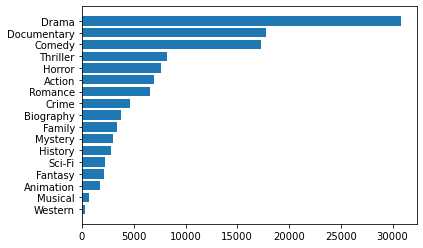

In [113]:
#Plot of Genre Popularity. 

fig, ax = plt.subplots()

ax.barh(list(genre_popularity.keys()),genre_popularity.values())


plt.show()

In [166]:
#Calculating average rating:

genre_rating ={}

for genre in genre_list: #loop through genre in the genre list defined prior
    n = 0 #number of movies 
    rating_sum = 0 #rating summation
    idx =0  #keep track of index
    for row in movie_basics_reviews_cleaned[genre]:
        if (row==True):
#             print(test['averagerating'][0])
            rating_sum += movie_basics_reviews_cleaned['averagerating'][idx]
            n+=1
        idx +=1
    genre_rating[genre] = rating_sum/n #rating summation divided by number of movies
    
genre_rating =dict(sorted(genre_rating.items(),key=lambda item: item[1]))

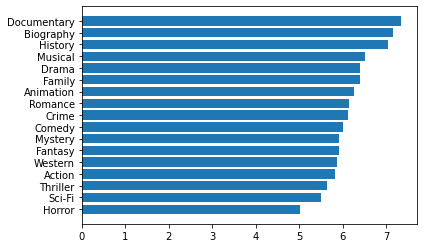

In [171]:
# Average rating by genre

fig, ax = plt.subplots()

ax.barh(list(genre_rating.keys()),genre_rating.values())


plt.show()

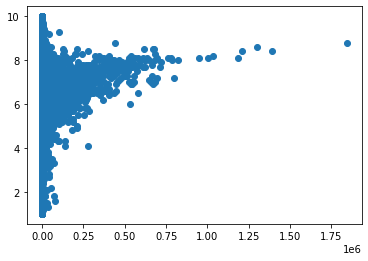

In [170]:
# Looking at correlation between average rating and number of reviews

fig, ax = plt.subplots()

ax.scatter(movie_basics_reviews_cleaned['numvotes'],movie_basics_reviews_cleaned['averagerating'])


plt.show()

In [169]:
movie_basics_reviews_cleaned.sort_values(by=['numvotes'], ascending = False)

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,Action,Comedy,Drama,...,Thriller,Western,Sci-Fi,Animation,Documentary,Biography,Crime,Musical,History,Family
2374,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,True,False,False,...,False,False,True,False,False,False,False,False,False,False
2228,tt1345836,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769,True,False,False,...,True,False,False,False,False,False,False,False,False,False
275,tt0816692,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,False,False,True,...,False,False,True,False,False,False,False,False,False,False
11963,tt1853728,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405,False,False,True,...,False,True,False,False,False,False,False,False,False,False
320,tt0848228,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655,True,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35407,tt3417906,The Nose,2013,52.0,Documentary,8.6,5,False,False,False,...,False,False,False,False,True,False,False,False,False,False
53547,tt5465608,Extramaterial,2016,59.0,Documentary,6.6,5,False,False,False,...,False,False,False,False,True,False,False,False,False,False
47390,tt4681636,Free Spaces,2015,60.0,Documentary,9.0,5,False,False,False,...,False,False,False,False,True,False,False,False,False,False
29744,tt2915328,Abou Al Oureef,2014,96.0,Comedy,5.2,5,False,True,False,...,False,False,False,False,False,False,False,False,False,False
